In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split

Trong bài này sử dụng 4 cách cho bộ dữ liệu mất cân bằng này
* Undersamling 
* Oversampling (blind copy)
* Oversampling (SMOTE)
* Ensemble using undersample

In [2]:
df = pd.read_csv(r'E:/AI/Deeplearning_codebasic/Data/customer_churn.csv')
df = df.drop('customerID',axis = 'columns')

In [3]:
df.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [4]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2230,Male,0,Yes,Yes,45,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.35,929.2,No
1856,Female,1,No,No,38,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),57.15,2250.65,Yes
4194,Female,0,Yes,No,71,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),25.95,1801.9,No
6055,Female,0,No,No,6,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.00,340.4,No
4584,Male,1,No,No,69,Yes,Yes,DSL,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),74.10,5031,No


In [6]:
df.TotalCharges.values #  là giá trị string, cần chuyển sang number

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [7]:
df[pd.to_numeric(df.TotalCharges,errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df1=df[df.TotalCharges!=' ']

In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5104\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [10]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
df1[df1.Churn == 'No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


### Data visualization

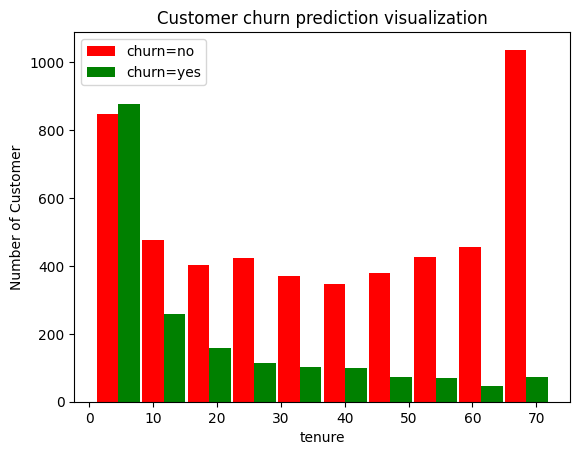

In [12]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure
plt.xlabel('tenure')
plt.ylabel('Number of Customer')
plt.title('Customer churn prediction visualization')

plt.hist([tenure_churn_no,tenure_churn_yes],rwidth=.95,color =['red','green'],label=['churn=no','churn=yes'])
plt.legend()

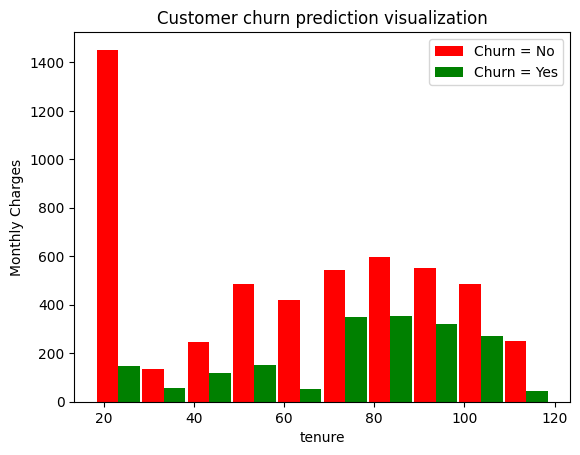

In [13]:
monthly_charges_yes = df1[df1.Churn=='Yes'].MonthlyCharges
monthly_charges_no = df1[df1.Churn=='No'].MonthlyCharges

plt.xlabel('tenure')
plt.ylabel('Monthly Charges')
plt.title('Customer churn prediction visualization')

plt.hist([monthly_charges_no,monthly_charges_yes],rwidth=.95,color = ['red','green'],label = ['Churn = No','Churn = Yes'])
plt.legend()

In [14]:
def print_unique_col_values(df):
    for i in df:
        if df[i].dtypes =='object':
            print(f'{i} : {df[i].unique()}')

In [15]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


#### Convert Yes _ No to 1 _ 0 

In [16]:
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for i in yes_no_columns:
    df1[i].replace({'Yes':1,'No':0,'No internet service':0,'No phone service':0},inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5104\1013618771.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i].replace({'Yes':1,'No':0,'No internet service':0,'No phone service':0},inplace = True)


In [17]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [18]:
df1['gender'].replace({'Female':1,'Male':0},inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_5104\2431751448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1,'Male':0},inplace = True)


In [19]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


#### One hot encoding for categorical columns

In [20]:
df2 = pd.get_dummies(data=df1, columns =['InternetService','PaymentMethod','Contract'])

## Train test split

In [21]:
X = df2.drop('Churn',axis = 'columns')
y = testLabels =  df2.Churn.astype(np.float32)

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15,test_size=.2,stratify =y)

In [23]:
y.value_counts()

0.0    5163
1.0    1869
Name: Churn, dtype: int64

In [24]:
y_train.value_counts()

0.0    4130
1.0    1495
Name: Churn, dtype: int64

#### Build a model ANN in tensorflow/keras

In [25]:
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
from tensorflow import keras

In [26]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model = keras.Sequential([
        keras.layers.Dense(26,input_dim = 26,activation = 'relu'),
        keras.layers.Dense(15,activation = 'relu'),
        keras.layers.Dense(1,activation = 'sigmoid')
    ])
    
    model.compile(optimizer = 'adam',loss = loss,metrics = ['accuracy'])
    
    if weights ==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
        model.fit(X_train,y_train,epochs = 100,class_weight = weight)
    print(model.evaluate(X_test,y_test))
    
    y_preds = model.predict(X_test)
    y_preds  = np.round(y_preds)
    
    print('Classification report: \n',classification_report(y_test,y_preds))
    
    return y_preds

In [27]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1)

Epoch 1/100
176/176 [==============================] - 3s 5ms/step - loss: 2.4296 - accuracy: 0.7104
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.7824 - accuracy: 0.7413
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.6303 - accuracy: 0.7582
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.6277 - accuracy: 0.7668
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.6083 - accuracy: 0.7676
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.6632 - accuracy: 0.7675
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.6732 - accuracy: 0.7719
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5442 - accuracy: 0.7756
Epoch 9/100
176/176 [==============================] - 1s 4ms/step - loss: 0.6078 - accuracy: 0.7739
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.5878 - accura

#  Mitigating Skewdness of Data

### Method 1: Undersampling

In [36]:
#class count
count_class_0,cout_class_1  = df2.Churn.value_counts()
df_class_0 = df2[df2.Churn == 0]
df_class_1 = df2[df2.Churn == 1]

In [41]:
df_class_0_under = df_class_0.sample(cout_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis = 0)
print('Random under-sampling:')
df_test_under['Churn'].value_counts()

Random under-sampling:


0    1869
1    1869
Name: Churn, dtype: int64

In [55]:
X = df_test_under.drop('Churn',axis = 'columns')
y = df_test_under.Churn
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15,test_size=.2,stratify=y)

In [56]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [60]:
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1) 

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 12.3288 - accuracy: 0.5933
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 1.1308 - accuracy: 0.6164
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.9777 - accuracy: 0.6753
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 1.0620 - accuracy: 0.7003
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.8935 - accuracy: 0.7104
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 1.2298 - accuracy: 0.6890
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.8174 - accuracy: 0.7087
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 1.0086 - accuracy: 0.7174
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7648 - accuracy: 0.7304
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.8619 - accuracy: 0.7338
Epoch 11

94/94 [==============================] - 0s 4ms/step - loss: 0.8860 - accuracy: 0.7261
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.9265 - accuracy: 0.7304
Epoch 85/100
94/94 [==============================] - 0s 5ms/step - loss: 0.7405 - accuracy: 0.7438
Epoch 86/100
94/94 [==============================] - 0s 5ms/step - loss: 0.7785 - accuracy: 0.7281
Epoch 87/100
94/94 [==============================] - 1s 6ms/step - loss: 0.7160 - accuracy: 0.7405
Epoch 88/100
94/94 [==============================] - 0s 5ms/step - loss: 0.9030 - accuracy: 0.7284
Epoch 89/100
94/94 [==============================] - 0s 5ms/step - loss: 0.6020 - accuracy: 0.7535
Epoch 90/100
94/94 [==============================] - 0s 5ms/step - loss: 0.6052 - accuracy: 0.7605
Epoch 91/100
94/94 [==============================] - 1s 5ms/step - loss: 0.5906 - accuracy: 0.7518
Epoch 92/100
94/94 [==============================] - 0s 5ms/step - loss: 0.6146 - accuracy: 0.7565
Epoch 93/100


###### Nhận thấy f1 score được cải thiện so với việc không sử dụng undersampling 


### Method 2: Oversampling

In [62]:
df_class_1_over = df_class_1.sample(count_class_0,replace = True)
df_test_over = pd.concat([df_class_0,df_class_1_over],axis = 0)
print('Random over-sampling')
print(df_test_over.Churn.value_counts())

Random over-sampling
0    5163
1    5163
Name: Churn, dtype: int64


In [63]:
X = df_test_under.drop('Churn',axis = 'columns')
y = df_test_under.Churn
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=15,test_size=.2,stratify=y)
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1) 

Epoch 1/100
94/94 [==============================] - 1s 5ms/step - loss: 7.5940 - accuracy: 0.6040
Epoch 2/100
94/94 [==============================] - 0s 5ms/step - loss: 1.3655 - accuracy: 0.6656
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 1.1644 - accuracy: 0.6846
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 2.0566 - accuracy: 0.6732
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 1.6952 - accuracy: 0.6957
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 1.9486 - accuracy: 0.6843
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 1.6992 - accuracy: 0.6963
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 1.4980 - accuracy: 0.6977
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 1.0309 - accuracy: 0.7157
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 1.6203 - accuracy: 0.6886
Epoch 11/

94/94 [==============================] - 0s 4ms/step - loss: 0.7168 - accuracy: 0.7448
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 1.0576 - accuracy: 0.7234
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 1.1826 - accuracy: 0.7154
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 1.3220 - accuracy: 0.7284
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7188 - accuracy: 0.7512
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.8404 - accuracy: 0.7338
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7031 - accuracy: 0.7475
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7057 - accuracy: 0.7515
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7596 - accuracy: 0.7371
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6890 - accuracy: 0.7505
Epoch 93/100


###### So với f1 score của undersampling có giảm nhẹ

### Method 3: SMOTE

In [66]:
X = df2.drop('Churn',axis = 'columns')
y = df2.Churn

In [72]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm,y_sm = smote.fit_resample(X,y)
y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X_sm,y_sm,random_state=15,test_size=.2,stratify=y_sm)
y_preds = ANN(X_train,y_train,X_test,y_test,'binary_crossentropy',-1) 

Epoch 1/100
259/259 [==============================] - 2s 5ms/step - loss: 1.4521 - accuracy: 0.6786
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 1.5189 - accuracy: 0.7063
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.9744 - accuracy: 0.7409
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 1.0702 - accuracy: 0.7464
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 1.0754 - accuracy: 0.7460
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.6551 - accuracy: 0.7789
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.9397 - accuracy: 0.7550
Epoch 8/100
259/259 [==============================] - 1s 4ms/step - loss: 0.9133 - accuracy: 0.7592
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 1.1799 - accuracy: 0.7476
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 1.0296 - accura

###### Nhận thấy accuracy, f1 score đều được cải thiện 1 cách rõ rệt

### Method 4: Use of Ensemble with undersampling

In [78]:
X = df2.drop('Churn',axis = 'columns')
y = df2.Churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [79]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model1 --> class1(1495) + class0(0, 1495)

model2 --> class1(1495) + class0(1496, 2990)

model3 --> class1(1495) + class0(2990, 4130)

In [98]:
def concat(df_majority,df_minority,start,end):
    df_train = pd.concat([df_majority[start:end],df_minority],axis = 0)
    X_train = df_train.drop('Churn',axis = 'columns')
    y_train = df_train.Churn
    return X_train,y_train

In [102]:
X_train,y_train = concat(df_class_0,df_class_1,0,1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
106/106 [==============================] - 1s 5ms/step - loss: 57.5423 - accuracy: 0.5372
Epoch 2/100
106/106 [==============================] - 1s 5ms/step - loss: 0.9772 - accuracy: 0.5919
Epoch 3/100
106/106 [==============================] - 1s 5ms/step - loss: 0.7434 - accuracy: 0.6635
Epoch 4/100
106/106 [==============================] - 1s 5ms/step - loss: 0.7063 - accuracy: 0.7128
Epoch 5/100
106/106 [==============================] - 0s 5ms/step - loss: 0.7874 - accuracy: 0.7048
Epoch 6/100
106/106 [==============================] - 0s 5ms/step - loss: 0.8482 - accuracy: 0.7117
Epoch 7/100
106/106 [==============================] - 0s 4ms/step - loss: 0.7873 - accuracy: 0.7167
Epoch 8/100
106/106 [==============================] - 1s 5ms/step - loss: 1.3521 - accuracy: 0.6902
Epoch 9/100
106/106 [==============================] - 1s 5ms/step - loss: 0.6601 - accuracy: 0.7194
Epoch 10/100
106/106 [==============================] - 1s 5ms/step - loss: 0.9220 - accur

In [103]:
X_train,y_train = concat(df_class_0,df_class_1,1496,2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
106/106 [==============================] - 1s 5ms/step - loss: 11.6631 - accuracy: 0.6036
Epoch 2/100
106/106 [==============================] - 1s 5ms/step - loss: 1.0126 - accuracy: 0.6976
Epoch 3/100
106/106 [==============================] - 1s 5ms/step - loss: 0.9506 - accuracy: 0.6899
Epoch 4/100
106/106 [==============================] - 1s 5ms/step - loss: 0.8408 - accuracy: 0.7139
Epoch 5/100
106/106 [==============================] - 1s 5ms/step - loss: 0.8171 - accuracy: 0.7006
Epoch 6/100
106/106 [==============================] - 1s 5ms/step - loss: 1.0769 - accuracy: 0.6997
Epoch 7/100
106/106 [==============================] - 1s 5ms/step - loss: 1.2175 - accuracy: 0.7077
Epoch 8/100
106/106 [==============================] - 1s 5ms/step - loss: 1.3132 - accuracy: 0.6949
Epoch 9/100
106/106 [==============================] - 1s 5ms/step - loss: 0.7846 - accuracy: 0.7354
Epoch 10/100
106/106 [==============================] - 1s 5ms/step - loss: 0.8626 - accur

In [104]:
X_train,y_train = concat(df_class_0,df_class_1,2991,4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 4ms/step - loss: 16.5073 - accuracy: 0.6263
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 1.4949 - accuracy: 0.6356
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 1.4179 - accuracy: 0.6413
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 1.0106 - accuracy: 0.7031
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 1.2798 - accuracy: 0.6862
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.9666 - accuracy: 0.7191
Epoch 7/100
94/94 [==============================] - 0s 4ms/step - loss: 1.5149 - accuracy: 0.6981
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7178 - accuracy: 0.7394
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7646 - accuracy: 0.7414
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.9359 - accuracy: 0.7237
Epoch 11

94/94 [==============================] - 0s 4ms/step - loss: 0.7564 - accuracy: 0.7503
Epoch 84/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7305 - accuracy: 0.7537
Epoch 85/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7267 - accuracy: 0.7520
Epoch 86/100
94/94 [==============================] - 0s 4ms/step - loss: 0.9032 - accuracy: 0.7360
Epoch 87/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6623 - accuracy: 0.7596
Epoch 88/100
94/94 [==============================] - 0s 4ms/step - loss: 0.9405 - accuracy: 0.7430
Epoch 89/100
94/94 [==============================] - 0s 4ms/step - loss: 0.9763 - accuracy: 0.7417
Epoch 90/100
94/94 [==============================] - 0s 4ms/step - loss: 0.6969 - accuracy: 0.7523
Epoch 91/100
94/94 [==============================] - 0s 4ms/step - loss: 0.8398 - accuracy: 0.7477
Epoch 92/100
94/94 [==============================] - 0s 4ms/step - loss: 0.7571 - accuracy: 0.7530
Epoch 93/100


In [105]:
y_pred_final = y_pred1.copy()

In [112]:
len(y_pred3)

1407

In [115]:
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones>1:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [116]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.95      0.41      0.57      1033
           1       0.37      0.94      0.53       374

    accuracy                           0.55      1407
   macro avg       0.66      0.67      0.55      1407
weighted avg       0.79      0.55      0.56      1407

